## count comm and diff to measure the distance between two components

[[[[[6, 7, 0], [0, 6, 6], [0, 0, 0]], [[6, 6, 7, 7, 0, 0], [6, 6, 7, 7, 0, 0], [0, 0, 6, 6, 6, 6], [0, 0, 6, 6, 6, 6], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]], [[[1, 0, 4], [0, 4, 0], [0, 1, 0]], [[1, 1, 0, 0, 4, 4], [1, 1, 0, 0, 4, 4], [0, 0, 4, 4, 0, 0], [0, 0, 4, 4, 0, 0], [0, 0, 1, 1, 0, 0], [0, 0, 1, 1, 0, 0]]], [[[3, 2, 0], [0, 7, 3], [0, 0, 0]], [[3, 3, 3, 2, 2, 2, 0, 0, 0], [3, 3, 3, 2, 2, 2, 0, 0, 0], [3, 3, 3, 2, 2, 2, 0, 0, 0], [0, 0, 0, 7, 7, 7, 3, 3, 3], [0, 0, 0, 7, 7, 7, 3, 3, 3], [0, 0, 0, 7, 7, 7, 3, 3, 3], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]], [[[0, 8, 0], [0, 6, 6], [9, 8, 0]], [[0, 0, 0, 8, 8, 8, 0, 0, 0], [0, 0, 0, 8, 8, 8, 0, 0, 0], [0, 0, 0, 8, 8, 8, 0, 0, 0], [0, 0, 0, 6, 6, 6, 6, 6, 6], [0, 0, 0, 6, 6, 6, 6, 6, 6], [0, 0, 0, 6, 6, 6, 6, 6, 6], [9, 9, 9, 8, 8, 8, 0, 0, 0], [9, 9, 9, 8, 8, 8, 0, 0, 0], [9, 9, 9, 8, 8, 8, 0, 0, 0]]], [[[4, 0, 3], [2, 2, 0], [0, 0, 8]], [[4, 4, 4, 4, 0, 0, 0, 0, 3, 3, 3, 3], [4, 4

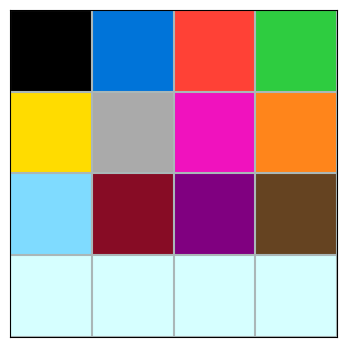

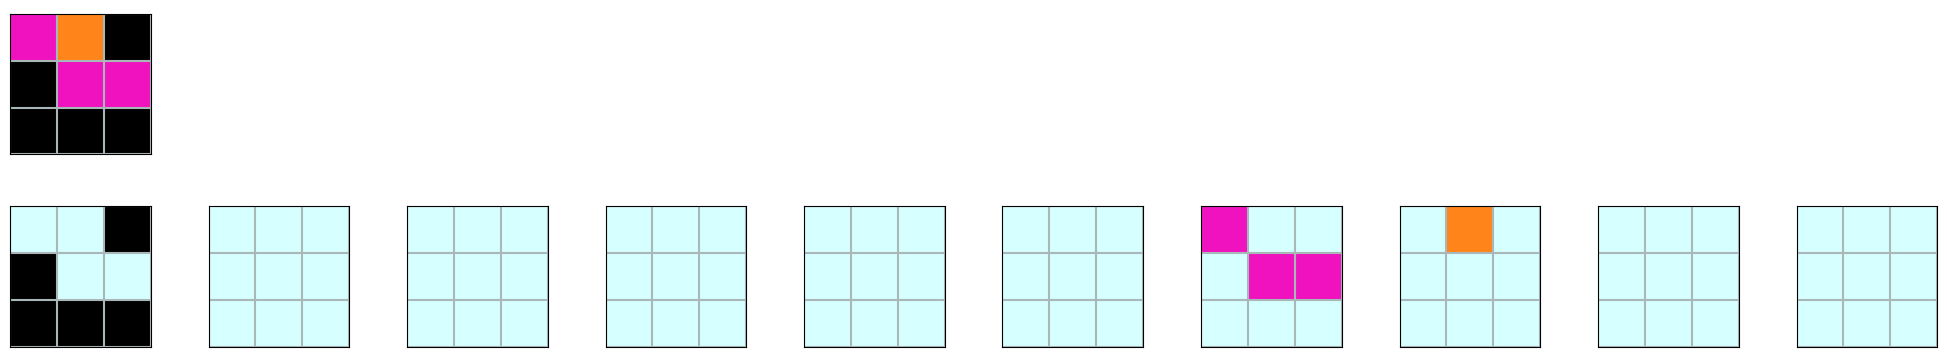

In [1]:
from basics.ARCLOADER import *
from basics.VISUALIZATION import *

arc = ARCDataset()
## list format (recommended) #########################################################################################
# type = 'train' or 'eval' / form = 'dict' or 'list' / shuffle = True or False / jcode = True or False
tasks, j_codes = arc.load_data(type = 'train', form = 'list_in_list', shuffle = False, jcode = True)

x = 25     # 0 - 399      (task number)
tt = 0    # 0 or 1       (train or test)
p = 0     # 0 - max pair (pair number)
io = 0    # 0 or 1       (input or output)

# print(tasks) - if form = 'list' / [x][0 or 1][p][0 or 1][row][col]
example_task = tasks[x]
example_pair = tasks[x][tt][p]
example_grid = tasks[x][tt][p][io]
print(example_task)


## json codes #########################################################################################
# print(j_codes)
print(arc.itoj(0, j_codes))
print(arc.jtoi('5c2c9af4', j_codes))


## visualization #######################################################################################################
color_pallette = [[0,1,2,3], [4,5,6,7], [8,9,10,11], [-1,-1,-1,-1]] # 3 additional colors 10 and 11 and 12(-1) [12 means null]
plot_data(color_pallette)


## tencolor split #######################################################################################################
plot_data(example_grid, keyword = 'tencolorsplit')



In [2]:
from basics.ARCLOADER import *
from basics.VISUALIZATION import *

# from DSL.dsl import *
# from DSL.dsl2 import *
from DSL.dsl3 import *
# from DSL.hodel_utils import *
# from DSL.property_DSL import *
# from DSL.util_DSL import *
# from DSL.transformation_DSL import *

# from KG_definition.node import *
# from KG_definition.new import *
# from KG_definition.edge import *

# from KG_construction.construction import *

from components.components import *

In [3]:
arc = ARCDataset()
tasks, j_codes = arc.load_data(type = 'train', form = 'list_in_list', shuffle = False, jcode = True)

t = 399    # 0 - 399      (task number)
tt = 0    # 0 or 1       (train or test)
p = 2     # 0 - max pair (pair number)
g = 1     # 0 or 1       (grid number)

example_task = tasks[t]
example_pair = tasks[t][tt][p]
example_grid = tasks[t][tt][p][g]

# plot_data(example_task, keyword = None)


In [4]:
tasks = tasks

entire_single_components = []
task_list = []

for t in range(len(tasks)):
    ttt = TASK(tasks, t)

    entire_single_components.append(ttt)
    task_list.append(ttt)
    pair_list = []

    for p in range(len(ttt.example_pairs)):
        ppp = PAIR(ttt, t, p)

        entire_single_components.append(ppp)
        pair_list.append(ppp)

        grid_list = []

        for g in range(len(ppp.grids)):
            ggg = GRID(ppp, t, p, g)
            # print(ggg.objects)

            entire_single_components.append(ggg)
            grid_list.append(ggg)

            object_list = []

            for o in range(len(ggg.objects)):
                ooo = OBJECT(ggg, t, p, g, o)

                entire_single_components.append(ooo)
                object_list.append(ooo)

                pixel_list = []

                for x in range(len(ooo.pixels)):
                    xxx = PIXEL(ooo, t, p, g, o, x)


                    entire_single_components.append(xxx)
                    pixel_list.append(xxx)

                ooo.pixel_list = pixel_list
            ggg.object_list = object_list
        ppp.grid_list = grid_list
    ttt.pair_list = pair_list



[(1, 8), (2, 8)]
[True, True, True]


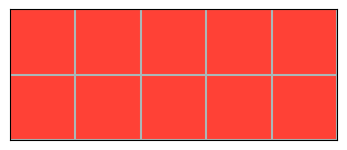

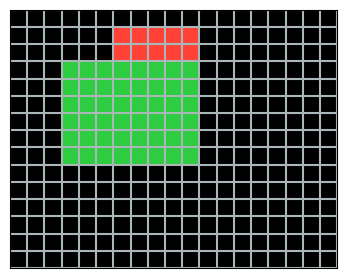

########################


In [8]:
t = 399
p = 2
g = 1
o = None
x = None

for component in entire_single_components:
    if component.id == (t, p, g, o, x):
        # print(component.type)
        # print(len(component.object_list))
        # plot_data(component.object_list[0].view)

        for object in component.object_list:
            if 2 in object.color and len(object.color) == 1:
                print(object.center)
                print(object.method)
                plot_data(object.view)
                plot_data(object.ancestor.view)
                print("########################")

# IMPORTANT checking the properties of the component

(399, 2, 1, 1, None)
object
[[3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3]]
[(3, (3, 4)), (3, (6, 9)), (3, (8, 3)), (3, (5, 7)), (3, (3, 10)), (3, (3, 5)), (3, (6, 4)), (3, (4, 6)), (3, (6, 10)), (3, (5, 8)), (3, (6, 5)), (3, (5, 3)), (3, (3, 6)), (3, (8, 8)), (3, (4, 7)), (3, (5, 9)), (3, (6, 6)), (3, (5, 4)), (3, (8, 9)), (3, (4, 8)), (3, (7, 7)), (3, (5, 10)), (3, (8, 4)), (3, (8, 10)), (3, (4, 9)), (3, (6, 7)), (3, (7, 8)), (3, (5, 5)), (3, (4, 3)), (3, (8, 5)), (3, (7, 6)), (3, (4, 4)), (3, (7, 3)), (3, (7, 9)), (3, (3, 7)), (3, (8, 6)), (3, (4, 5)), (3, (6, 3)), (3, (7, 4)), (3, (7, 10)), (3, (8, 7)), (3, (3, 8)), (3, (7, 5)), (3, (3, 3)), (3, (6, 8)), (3, (5, 6)), (3, (3, 9)), (3, (4, 10))]
[[3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3]]
[3]
range(0, 6)
range(0, 8)

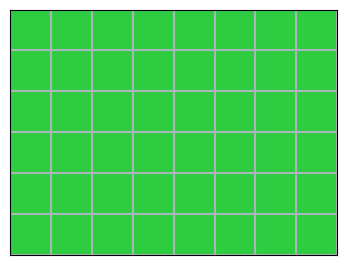

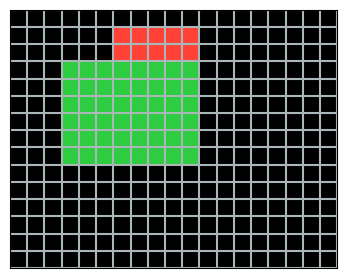

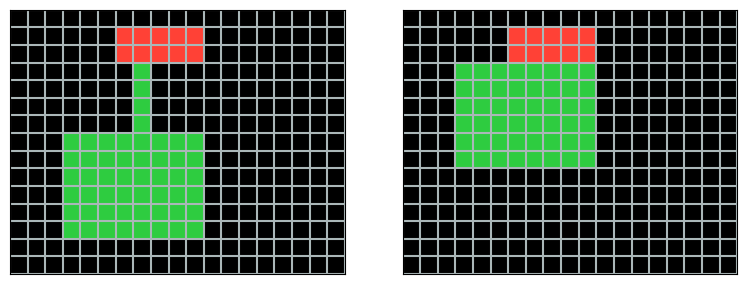

########################


In [9]:
t = 399
p = 2
g = 1
o = 1
x = None

for component in entire_single_components:
    if component.id == (t, p, g, o, x):
        # print(component.type)
        # print(len(component.object_list))
        # plot_data(component.object_list[0].view)

        # for object in component.object_list:
        #     if 2 in object.colorset and len(object.colorset) == 1:
        #         print(object.center)
        #         print(object.method)
        #         plot_data(object.view)
        #         plot_data(object.ancestor.view)
        #         print("########################")
        #########################################################################
        # check component properties individually
        #########################################################################

        # mandatories
        print(component.id)
        print(component.type)

        # visualization
        print(component.view)

        # representations
        print(component.colcoord)
        print(component.colorgrid)

        # properties (shared)
        print(component.color)
        print(component.row_index)
        print(component.col_index) 
        print(component.coordinate)

        # object properties (not in pixel)
        # print(component.pos) # not in grid
        # print(component.method) # not in grid
        print(component.height)
        print(component.width)
        print(component.size)
        print(component.shape)
        print(component.area)
        print(component.center)

        print(component.margin)
        print(component.inner)
        print(component.corner)
        print(component.edge)

        print(component.left_top)
        print(component.right_top)
        print(component.left_bottom)
        print(component.right_bottom)

        print(component.hori_symm)
        print(component.verti_symm)
        print(component.diag_symm)
        print(component.anti_diag_symm)

        #########################################################################


        plot_data(component.view)
        plot_data(component.ancestor.view)
        plot_data(component.ancestor.ancestor.view)
        print("########################")

## xxxxxxxx

In [6]:
# print(len(entire_single_components))
# print(len(task_list))
# print(len(pair_list))
# print(len(grid_list))
# print(len(object_list))
# print(len(pixel_list))

# def compare(component1, component2):
#     if 
#     relation_type = "comm"
#     relation_type = "diff"
#     return relation_type, content, 

def difference(a, b):
    if type(a) == int:
        diff = b - a
        print("Aaaaaa")
        return diff
    
    elif type(a) == tuple:
        diff = []
        for i in range(len(a)):
            print("BBbbbb")
            diff.append(b[i] - a[i])
            print(diff)

        return tuple(diff)


t = 399
p = 2
g = 0
o = None
x = None

for component in entire_single_components:
    if component.id == (t, p, g, o, x):
        # plot_data(component.view)
        # print(component.coordinate)
        # plot_data(component.ancestor.view)
        # print(component.coordinate_abs)
        # plot_data(component.ancestor.ancestor.view)
        a = component.property
        print(component.property.keys())
        # print(component.property)
        # print(a)
    # if component.id == (t, p, g, o, x+2):
    # if component.id == (t, p, g, o+2, x):
    if component.id == (t, p, g+1, o, x):
        b = component.property
        # print(b)
        
print("a is ", a)
print("b is ", b)
print()
num_of_comm = 0 
num_of_diff = 0
for key in a.keys():
    if a[key] == b[key]:
        print(key, "comm", str(a[key]) + " = " + str(b[key]))
        num_of_comm += 1

    else:
        print(key, "diff", str(a[key]) + " @ " + str(b[key]))
        num_of_diff += 1

print("num_of_comm is ", num_of_comm)
print("num_of_diff is ", num_of_diff)


# comm and diff 를 비교하는데 margin 같은 것도 비교하는 것이 맞는가?
# property 라는 것은 DIKW 중에서 어느 레벨에 속하는가
# 인간이 기본적으로 보는 property는 무엇이고 어떤 property는 생각을 한 후에 중요성을 파악하고 알아내는 것인가?




AttributeError: 'GRID' object has no attribute 'property'